There are 8 different trackers available in OpenCV 3.4.x — BOOSTING, MIL, KCF, TLD, MEDIANFLOW, GOTURN, MOSSE and CSRT

In [8]:
import cv2
import sys
import matplotlib.pyplot as plt
%matplotlib inline

cv2_version = str(cv2.__version__)
major_ver, minor_ver, subminor_ver = cv2_version.split('.')

print (major_ver, minor_ver, subminor_ver)

3 4 4


In [17]:
# Set up tracker.
# Instead of MIL, you can also use

tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'GOTURN', 'CSRT']
tracker_type_no = input('Choose tracker type: 0-6')
tracker_type = tracker_types[int(tracker_type_no)]

print(tracker_type)

    
if int(minor_ver) < 3:
    tracker = cv2.Tracker_create(tracker_type)
else:
    if tracker_type == 'BOOSTING':
        tracker = cv2.TrackerBoosting_create()
    if tracker_type == 'MIL':
        tracker = cv2.TrackerMIL_create()
    if tracker_type == 'KCF':
        tracker = cv2.TrackerKCF_create()
    if tracker_type == 'TLD':
        tracker = cv2.TrackerTLD_create()
    if tracker_type == 'MEDIANFLOW':
        tracker = cv2.TrackerMedianFlow_create()
    if tracker_type == 'GOTURN':
        tracker = cv2.TrackerGOTURN_create()
    if tracker_type == "CSRT":
        tracker = cv2.TrackerCSRT_create()


Choose tracker type: 0-62
KCF


In [18]:
# Read video
video = cv2.VideoCapture("videos/chaplin.mp4")

# Exit if video not opened.
if not video.isOpened():
    print("Could not open video")
    raise

# Read first frame.
ok, frame = video.read()
if not ok:
    print('Cannot read video file')
    raise

# Define an initial bounding box
bbox = (287, 23, 86, 320)

# # Uncomment the line below to select a different bounding box
# bbox = cv2.selectROI(frame, False)

# Initialize tracker with first frame and bounding box
ok = tracker.init(frame, bbox)

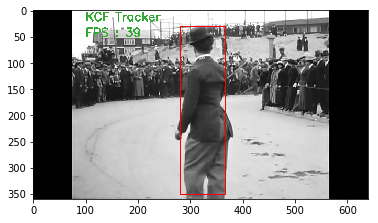

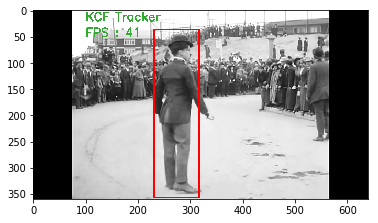

done processing


In [19]:
print_after_frames = 50
counting = 0
try:
    while True:
        # Read a new frame
        ok, frame = video.read()
        if not ok:
            break

        # Start timer
        timer = cv2.getTickCount()

        # Update tracker
        ok, bbox = tracker.update(frame)

        # Calculate Frames per second (FPS)
        fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer);

        # Draw bounding box
        if ok:
            # Tracking success
            p1 = (int(bbox[0]), int(bbox[1]))
            p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
            cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
        else :
            # Tracking failure
            cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)

        # Display tracker type on frame
        cv2.putText(frame, tracker_type + " Tracker", (100,20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50),2);

        # Display FPS on frame
        cv2.putText(frame, "FPS : " + str(int(fps)), (100,50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50), 2);


#         # Display result
#         cv2.imshow("Tracking", frame)
        
        # matplot as background so we can draw one by one
        # to break the loop, press ESC, then I twice
        counting += 1
        if counting >= print_after_frames:
            plt.imshow(frame)
            plt.show()
            counting = 0

except KeyboardInterrupt:
    pass

print ('done processing')